In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
uploaded = files.upload()

Saving AerialBayENC_2019 (1).csv to AerialBayENC_2019 (1).csv


In [2]:
df=pd.read_csv(io.BytesIO(uploaded['AerialBayENC_2019 (1).csv']))
df.head() #displays first 5 elements

,Timestamp(UTC),height(m)
0,2019-01-01 00:00:00,1.463
1,2019-01-01 00:01:00,1.462
2,2019-01-01 00:02:00,1.462
3,2019-01-01 00:03:00,1.461
4,2019-01-01 00:04:00,1.459


In [33]:
df.max()

14.423

In [3]:
#1st 3 months
df=df.iloc[:93265,1:2].values

In [4]:
df

array([[1.463],
       [1.462],
       [1.462],
       ...,
       [1.434],
       [1.436],
       [1.438]])

In [5]:
X_train=df[0:93264]
Y_train=df[1:93265]

In [6]:
X_train=np.reshape(X_train,(93264,1,1))

In [7]:
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [34]:
#IMPORTING LSTM
#EPOCHS=100

In [8]:
reg=Sequential()
reg.add(LSTM(units=4,activation='relu',input_shape=(None,1)))
reg.add(Dense(units=1))
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,Y_train,batch_size=10,epochs=100)

Epoch 1/100
9327/9327 [==============================] - 38s 4ms/step - loss: 0.1897
Epoch 2/100
9327/9327 [==============================] - 37s 4ms/step - loss: 0.0136
Epoch 3/100
9327/9327 [==============================] - 35s 4ms/step - loss: 0.0148
Epoch 4/100
9327/9327 [==============================] - 36s 4ms/step - loss: 0.0206
Epoch 5/100
9327/9327 [==============================] - 34s 4ms/step - loss: 0.0215
Epoch 6/100
9327/9327 [==============================] - 36s 4ms/step - loss: 0.0260
Epoch 7/100
9327/9327 [==============================] - 37s 4ms/step - loss: 0.0152
Epoch 8/100
9327/9327 [==============================] - 36s 4ms/step - loss: 0.0199
Epoch 9/100
9327/9327 [==============================] - 37s 4ms/step - loss: 0.0153
Epoch 10/100
9327/9327 [==============================] - 36s 4ms/step - loss: 0.0154
Epoch 11/100
9327/9327 [==============================] - 34s 4ms/step - loss: 0.0143
Epoch 12/100
9327/9327 [==============================] - 36s 4

In [11]:
#testing with 4th month
uploaded1 = files.upload()
dg=pd.read_csv(io.BytesIO(uploaded['AerialBayENC_2019 (1).csv']))
dg=dg.iloc[93265:127549,1:2].values
#dh=pd.read_csv(r'C:\Users\medik\Downloads\AerialBayENC_2019 (1).csv')


Saving AerialBayENC_2019 (1).csv to AerialBayENC_2019 (1) (2).csv


In [35]:
#TESTING DATA WITH 4TH MONTH

In [25]:
dg=pd.read_csv(io.BytesIO(uploaded['AerialBayENC_2019 (1).csv']))
dg=dg.iloc[93265:127549,1:2].values


In [26]:
dh=pd.read_csv(io.BytesIO(uploaded['AerialBayENC_2019 (1).csv']))
dh=dh.iloc[93265:127549,1:2].values


In [27]:
dg=np.reshape(dg,(34284,1,1))
dg

array([[[1.232]],

       [[1.237]],

       [[1.24 ]],

       ...,

       [[1.539]],

       [[1.543]],

       [[1.565]]])

In [28]:
reg.predict(dg)


array([[1.2258794],
       [1.2308671],
       [1.23386  ],
       ...,
       [1.5311816],
       [1.5351412],
       [1.5569081]], dtype=float32)

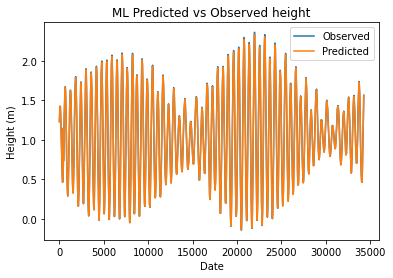

In [36]:
plt.plot(np.arange(0,34284),dh,label='Observed')
plt.plot(np.arange(0,34284),reg.predict(dg),label='Predicted')
plt.xlabel('Date')
plt.ylabel('Height (m)')
plt.title('ML Predicted vs Observed height')
plt.legend()

In [39]:
from sklearn.metrics import mean_squared_error
print('RMSE: ',np.sqrt(mean_squared_error(dh,reg.predict(dg))))

RMSE:  0.007300101950517569
